In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../../')
print(os.getcwd())
from load_config import load_config
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.strategy.indicators.notebook_utils import loadData
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier


/home/marshingjay/Repos/vivaldi/back_testing


In [2]:
# features = ["RSI", "MACD", "stosc_k", "stosc_d", "RateOfChange_MACD_1", "RateOfChange_MACD_5", "RateOfChange_MACD_10", "RateOfChange_MACD_60", "RateOfChange_RSI_1", "RateOfChange_RSI_5", "RateOfChange_RSI_10", "RateOfChange_RSI_60", "RateOfChange_close_1", "RateOfChange_close_5", "RateOfChange_close_10", "RateOfChange_close_60"]


In [4]:
dataset, features = loadData(indicators=['rsi', 'cci', 'optimal_v2', 'willr', 'natr'],
                            param_spec={},
                            optimal_threshold=0.8,
                            optimal_mode='buy',
                            spans=[{'indicator_name':'roc',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60]},
                                    {'indicator_name':'roc',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60]},
                                    {'indicator_name':'roc',
                                    'column_name': 'WILLR',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60]},
                                    {'indicator_name':'roc',
                                    'column_name': 'NATR',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60]},
                                    {'indicator_name':'roc',
                                    'column_name': 'CCI',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'RSI',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'WILLR',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'NATR',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'CCI',
                                    'param_name': 'period',
                                    'param_values': [1,5,10,60]}
                                    ],
                            scale='minmax')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi




Loading data from BTCUSDT-1m...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from chunk 5...
Loading data from chunk 6...
Loading data from chunk 7...
Loading data from chunk 8...
Loading data from chunk 9...
Loading data from chunk 10...
Loading data from chunk 11...


In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset

,time,high,low,close,open,volume,RSI,MACD,MACD_signal,MACD_hist,...,RateOfChange_close_period_10,RateOfChange_close_period_60,RateOfChange_RSI_period_1,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_60,RateOfChange_MACD_period_1,RateOfChange_MACD_period_5,RateOfChange_MACD_period_10,RateOfChange_MACD_period_60
1297,1503020399999,4202.73,4202.73,4211.167929,4202.73,0.405050,0.398052,0.483927,0.494979,0.547915,...,0.428508,0.352775,0.465650,0.418491,0.439788,0.413003,0.347270,0.258579,0.211895,0.456012
1298,1503020459999,4202.73,4202.73,4206.948965,4202.73,0.000000,0.398052,0.483636,0.494882,0.547588,...,0.425373,0.350962,0.484679,0.418491,0.439788,0.413003,0.347270,0.258579,0.211895,0.456013
1299,1503020519999,4221.87,4221.87,4214.409482,4221.87,0.636576,0.410046,0.483435,0.494785,0.547396,...,0.430357,0.354109,0.514869,0.435155,0.454828,0.426200,0.347269,0.258579,0.211895,0.456013
1300,1503020579999,4221.87,4221.87,4218.139741,4221.87,0.383777,0.410046,0.483237,0.494686,0.547210,...,0.430101,0.355979,0.484679,0.435155,0.448572,0.427363,0.347269,0.258579,0.211895,0.456013
1301,1503020639999,4231.61,4221.87,4224.874871,4221.87,0.295270,0.416089,0.483086,0.494587,0.547093,...,0.433301,0.358977,0.499714,0.448823,0.456113,0.434018,0.347269,0.258579,0.211895,0.456013
1302,1503020699999,4231.61,4212.65,4228.242435,4212.65,3.762433,0.416089,0.482938,0.494488,0.546982,...,0.434900,0.361635,0.484679,0.459629,0.456113,0.438600,0.347269,0.258579,0.211895,0.456013
1303,1503020759999,4238.89,4231.61,4229.926218,4231.61,0.270654,0.416089,0.482792,0.494387,0.546875,...,0.435700,0.367068,0.484679,0.459629,0.456113,0.454800,0.347269,0.258579,0.211895,0.456013
1304,1503020819999,4231.61,4231.61,4230.768109,4231.61,0.415498,0.416089,0.482649,0.494287,0.546772,...,0.436099,0.365681,0.484679,0.442683,0.456113,0.437881,0.347269,0.258579,0.211894,0.456013
1305,1503020879999,4238.88,4238.88,4234.824054,4238.88,0.214518,0.420609,0.482541,0.494186,0.546722,...,0.438782,0.366532,0.495858,0.448958,0.461753,0.442875,0.347269,0.258579,0.211894,0.456013
1306,1503020939999,4238.88,4238.88,4236.852027,4238.88,0.374562,0.420609,0.482436,0.494085,0.546675,...,0.442407,0.367691,0.484679,0.440531,0.466509,0.445725,0.347269,0.258579,0.211894,0.456013


In [8]:
final_dataset = dataset

In [9]:
dataset = []

In [10]:
final_dataset

,time,high,low,close,open,volume,RSI,MACD,MACD_signal,MACD_hist,...,RateOfChange_close_period_10,RateOfChange_close_period_60,RateOfChange_RSI_period_1,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_60,RateOfChange_MACD_period_1,RateOfChange_MACD_period_5,RateOfChange_MACD_period_10,RateOfChange_MACD_period_60
1297,1503020399999,4202.73,4202.73,4211.167929,4202.73,0.405050,0.398052,0.483927,0.494979,0.547915,...,0.428508,0.352775,0.465650,0.418491,0.439788,0.413003,0.347270,0.258579,0.211895,0.456012
1298,1503020459999,4202.73,4202.73,4206.948965,4202.73,0.000000,0.398052,0.483636,0.494882,0.547588,...,0.425373,0.350962,0.484679,0.418491,0.439788,0.413003,0.347270,0.258579,0.211895,0.456013
1299,1503020519999,4221.87,4221.87,4214.409482,4221.87,0.636576,0.410046,0.483435,0.494785,0.547396,...,0.430357,0.354109,0.514869,0.435155,0.454828,0.426200,0.347269,0.258579,0.211895,0.456013
1300,1503020579999,4221.87,4221.87,4218.139741,4221.87,0.383777,0.410046,0.483237,0.494686,0.547210,...,0.430101,0.355979,0.484679,0.435155,0.448572,0.427363,0.347269,0.258579,0.211895,0.456013
1301,1503020639999,4231.61,4221.87,4224.874871,4221.87,0.295270,0.416089,0.483086,0.494587,0.547093,...,0.433301,0.358977,0.499714,0.448823,0.456113,0.434018,0.347269,0.258579,0.211895,0.456013
1302,1503020699999,4231.61,4212.65,4228.242435,4212.65,3.762433,0.416089,0.482938,0.494488,0.546982,...,0.434900,0.361635,0.484679,0.459629,0.456113,0.438600,0.347269,0.258579,0.211895,0.456013
1303,1503020759999,4238.89,4231.61,4229.926218,4231.61,0.270654,0.416089,0.482792,0.494387,0.546875,...,0.435700,0.367068,0.484679,0.459629,0.456113,0.454800,0.347269,0.258579,0.211895,0.456013
1304,1503020819999,4231.61,4231.61,4230.768109,4231.61,0.415498,0.416089,0.482649,0.494287,0.546772,...,0.436099,0.365681,0.484679,0.442683,0.456113,0.437881,0.347269,0.258579,0.211894,0.456013
1305,1503020879999,4238.88,4238.88,4234.824054,4238.88,0.214518,0.420609,0.482541,0.494186,0.546722,...,0.438782,0.366532,0.495858,0.448958,0.461753,0.442875,0.347269,0.258579,0.211894,0.456013
1306,1503020939999,4238.88,4238.88,4236.852027,4238.88,0.374562,0.420609,0.482436,0.494085,0.546675,...,0.442407,0.367691,0.484679,0.440531,0.466509,0.445725,0.347269,0.258579,0.211894,0.456013


In [8]:
# import joblib

# joblib.dump(mm_scalar, './mm_scalar.sav')

In [11]:


train, test = train_test_split(final_dataset, test_size=0.05, shuffle=False)


<h3>Models</h3>
<p>Random Forest</p>
<p>Fine tuned RF</p>
<p>Gradient boost</p>
<p>GB inside RF</p>
<p>RF inside GB</p>
<p>LSTM</p>

In [13]:

buy_signals = train[train['Optimal_v2'] == 1.0]

In [14]:
mean_num_singals = int(len(buy_signals))

In [16]:
not_signals = train[train['Optimal_v2'] == 0.0]


In [17]:
print(mean_num_singals, len(not_signals))

66780 1554726


In [18]:
not_signals_sampled = not_signals.sample(n=mean_num_singals * 8, random_state=69420, axis=0)
not_signals_sampled = not_signals_sampled.sample(frac=1)

In [19]:

balanced_data_buy = pd.concat([not_signals_sampled, buy_signals])
not_signals_sampled = []
buy_signals = []
not_signals = []


In [23]:
# filtered_balanced_data_buy = balanced_data_buy[["close", "stosc_k", "stosc_d", "slope", 'rsi']]
filtered_balanced_data_buy = balanced_data_buy[features]




balanced_data_optimal_buy = balanced_data_buy[['Optimal_v2']]
balanced_data_buy = []



In [24]:
filtered_balanced_data_buy

,RSI,MACD,MACD_signal,MACD_hist,slowk,slowd,RSI,MACD,MACD_signal,MACD_hist,...,RateOfChange_close_period_10,RateOfChange_close_period_60,RateOfChange_RSI_period_1,RateOfChange_RSI_period_5,RateOfChange_RSI_period_10,RateOfChange_RSI_period_60,RateOfChange_MACD_period_1,RateOfChange_MACD_period_5,RateOfChange_MACD_period_10,RateOfChange_MACD_period_60
1271553,0.454465,0.505085,0.504416,0.569033,0.427476,0.352769,0.454465,0.505085,0.504416,0.569033,...,0.427687,0.391572,0.490407,0.421795,0.432689,0.452945,0.347272,0.258580,0.211894,0.456010
1289924,0.470258,0.503481,0.503521,0.567628,0.286052,0.470465,0.470258,0.503481,0.503521,0.567628,...,0.434455,0.394583,0.483191,0.437349,0.457398,0.472830,0.347266,0.258576,0.211892,0.456009
1020610,0.494533,0.544075,0.543898,0.583898,0.733139,0.650470,0.494533,0.544075,0.543898,0.583898,...,0.426601,0.384497,0.472365,0.418840,0.431882,0.425831,0.347268,0.258578,0.211893,0.456010
1446081,0.435450,0.481718,0.479119,0.561905,0.597689,0.538814,0.435450,0.481718,0.479119,0.561905,...,0.436350,0.394161,0.494274,0.455800,0.464521,0.477250,0.347268,0.258578,0.211894,0.456011
592756,0.487217,0.504424,0.505161,0.567241,0.350927,0.442629,0.487217,0.504424,0.505161,0.567241,...,0.433460,0.398948,0.489542,0.451906,0.464409,0.506829,0.347264,0.258575,0.211891,0.456009
364677,0.491481,0.525335,0.548487,0.551097,0.669841,0.691754,0.491481,0.525335,0.548487,0.551097,...,0.433413,0.394318,0.487349,0.439071,0.451905,0.466717,0.347268,0.258578,0.211893,0.456009
1007615,0.415730,0.442815,0.446868,0.539297,0.291972,0.336067,0.415730,0.442815,0.446868,0.539297,...,0.444123,0.392992,0.487805,0.462962,0.470789,0.481361,0.347268,0.258578,0.211894,0.456010
381771,0.399126,0.444235,0.421448,0.569079,0.114445,0.146252,0.399126,0.444235,0.421448,0.569079,...,0.433955,0.391375,0.483992,0.439179,0.455126,0.474076,0.347268,0.258578,0.211893,0.456010
935098,0.478705,0.509232,0.531249,0.545972,0.585761,0.806062,0.478705,0.509232,0.531249,0.545972,...,0.430623,0.400083,0.484665,0.425962,0.444683,0.484388,0.347269,0.258579,0.211895,0.456009
495690,0.503612,0.496676,0.505803,0.555047,0.504254,0.605638,0.503612,0.496676,0.505803,0.555047,...,0.455559,0.423113,0.484233,0.412573,0.511382,0.596731,0.347265,0.258575,0.211891,0.456010


In [25]:

clf_buy = RandomForestClassifier(random_state=69420, n_jobs=-1, n_estimators=100, criterion='gini', min_samples_leaf=2)

clf_buy.fit(filtered_balanced_data_buy, balanced_data_optimal_buy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=69420,
                       verbose=0, warm_start=False)

In [26]:
def insert_buys(close, prediction):
    if prediction == 1:
        return close
    else:
        return None

def insert_sells(close, prediction):
    if prediction == -1:
        return close
    else:
        return None



In [27]:
import pickle

In [29]:
filtered_test = test[["close", 'Optimal_v2', 'volume']]
filtered_test_2 = test[features]

In [30]:
# filtered_sell = test[["close", "rsi", "MACD", "stosc_k", "stosc_d", "slope", "variance"]]

In [31]:
# sell_model = pickle.load(open('./v2/strategy/saved_models/optimal_v2_sell_rf.sav', 'rb'))

In [32]:
filtered_test['predict_buy'] = clf_buy.predict(filtered_test_2.values)
# filtered_test['predict_sell'] = sell_model.predict(filtered_sell)

In [33]:
len(filtered_test)

85343

In [34]:
len(filtered_test[filtered_test['predict_buy'] != 0.0])

1431

In [36]:

filtered_test['buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.predict_buy), axis=1)
filtered_test['optimal_buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.Optimal_v2), axis=1)
# filtered_test['sell'] = filtered_test.apply(lambda x: insert_sells(x.close, x.predict_sell), axis=1)



In [80]:
from v2.strategy.indicators.bollinger_bands import BollingerBands

In [81]:
bollinger_bands_params = Param(0,0,0,'period',175)
boll = BollingerBands(_params=[bollinger_bands_params])
boll.genData(filtered_test, gen_new_values=False)


In [38]:
reset_filtered = filtered_test.reset_index(drop=True)

In [39]:
# reset_filtered

In [40]:
# reset_filtered['count'] = reset_filtered['sell'].rolling(60).count() - reset_filtered['buy'].rolling(60).count() 

In [41]:
# reset_filtered

In [49]:
first_amnt = reset_filtered[57000:58000]
first_amnt['volume'] = first_amnt['volume'].rolling(window=10).mean()

<Figure size 432x288 with 0 Axes>

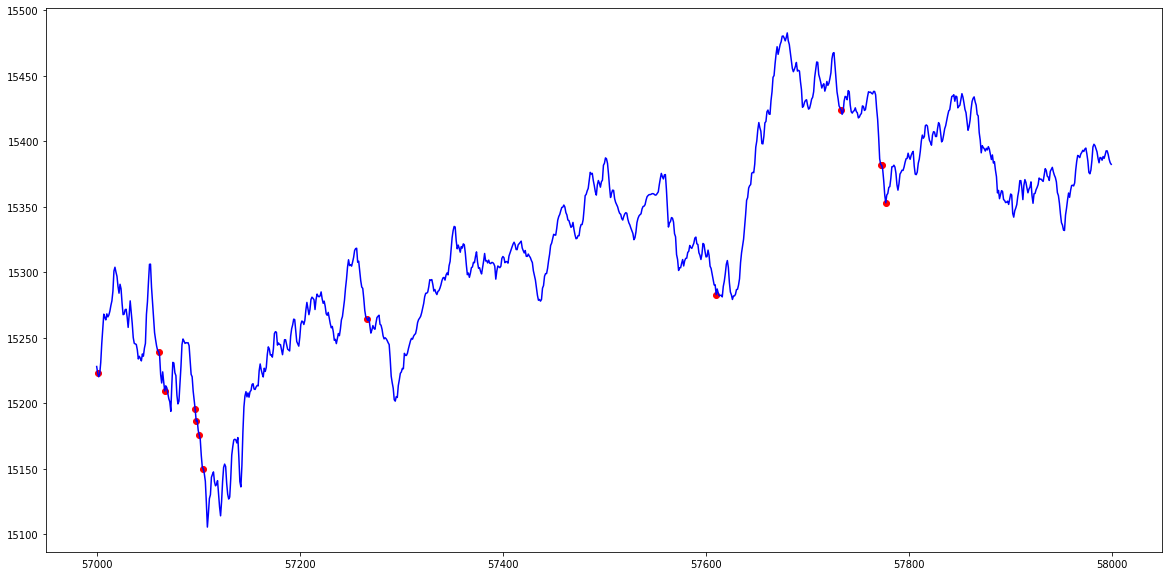

In [50]:
import matplotlib.pyplot as plt
plt.clf()

plt.figure(figsize=(20,10))
plt.scatter(x=first_amnt.index, y=first_amnt['buy'], color='red')

# plt.scatter(x=first_amnt.index, y=first_amnt['optimal_buy'], color='purple')

# plt.scatter(x=first_amnt.index, y=first_amnt['sell'], color='green')

plt.plot(first_amnt.index, first_amnt['close'], color='blue')
plt.show()

In [51]:
# plt.figure(figsize=(20,10))
# plt.plot(first_amnt.index, first_amnt['count'].rolling(480).mean(), color='purple')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(1440).mean(), color='blue')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(4320).mean(), color='orange')
# plt.show()